In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

matplotlib.rcParams['figure.figsize'] = [12, 7]
matplotlib.rcParams['text.usetex'] = False



ModuleNotFoundError: No module named 'numpy'

In [198]:
h = 0.005
tau1 = tau2 = tau = 0.01
sigma = 10.0
rho1 = -1.0
rho2 = 0.0
rho3 = 1.0
T = 50000

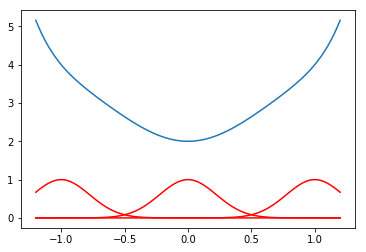

In [240]:
u = 0.0
v = 1.0
w = 0.0
phi = lambda rho: (rho - rho1)**2*(rho - rho2)**2*(rho - rho3)**2 + (1-u)*(rho - rho1)**2 + (1-v)*(rho - rho2)**2 + (1-w)*(rho - rho3)**2
dphi = lambda rho: 2.0*(rho - rho1)*(rho - rho2)*(rho - rho3)*((rho - rho1)*(rho - rho2) + (rho - rho1)*(rho -rho3) +
                    (rho - rho2)*(rho - rho3)) + 2.0*(1-u)*(rho - rho1) + 2.0*(1-v)*(rho - rho2) + 2.0*(1-w)*(rho - rho3) 
rho = np.linspace(-1.2, 1.2, 100)

g = lambda x, r: np.exp(-sigma*(x - r)**2)

y = phi(rho)
dy = np.diff(y)
plt.plot(rho, phi(rho))
# plt.plot(rho, dphi(rho))
plt.plot(rho, g(rho, rho1), 'r')
plt.plot(rho, g(rho, rho2), 'r')
plt.plot(rho, g(rho, rho3), 'r')
# plt.axis([-1.2, 1.2, -1, 2])
plt.show()

Biffurcation diagram for the emergence of bouting with two motivations

-0.5


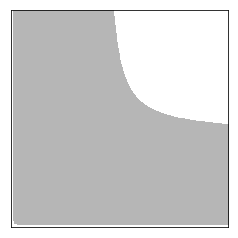

In [232]:

def Delta( mu1, mu2, sigma ):
    alpha = np.exp(-sigma)/(mu1 + np.exp(-sigma))
    beta = np.exp(-sigma)/(mu2 + np.exp(-sigma))
    es = np.exp(-sigma)

    p = mu1 + es
    q = mu2 + es
    r = sigma*(1 - beta)*es
    s = sigma*(1 - alpha)*es

    a = -1.0
    b = -(p + q - alpha - beta)
    c = -(p*q + r + s - (p + q)*(alpha + beta))
    d = -(p*r + s*q -  p*q*(alpha + beta))

    Q = lambda x: +a*x**3 + b*x**2 + c*x + d

    vDelta = (4.0*(b**2 - 3.0*a*c)**3 - (2.0*b**3 - 9.0*a*b*c + 27.0*a**2*d)**2)/(27.0*a**2)
    return vDelta

N = 500
mu1 = mu2 = np.linspace(np.exp(-sigma), 0.1, N)
D = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        D[i,j] = Delta(mu1[i], mu2[j], sigma )

fig, ax = plt.subplots(1,1)
ax.imshow(np.sign(D)*0.5, cmap='gray', vmin = -3, vmax = 0.5)
print np.min(np.sign(D)*0.5)
# plt.xlabel('mu1')
# plt.ylabel('mu2')
ax.invert_yaxis()
ax.set_xticks([])
# ax.set_xticklabels([0, mu1[N-1]])
ax.set_yticks([])
# ax.set_yticklabels([0, mu2[N-1]])
plt.show()

Simulation of the bouting with three moivations

In [5]:
def integrate( f, T, x0 ):
    X = np.zeros((len(x0), T))
    time = np.zeros(T)
    X[:,0] = x0

    for i in range(T-1):
        k1 = f(time[i], X[:,i])
        k2 = f(time[i] + h/2.0, X[:,i] + h*k1/2.0)
        k3 = f(time[i] + h/2.0, X[:,i] + h*k2/2.0)
        k4 = f(time[i] + h, X[:,i] + h*k3)
        X[:, i+1] = X[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6.0
        time[i+1] = time[i] + h
        
    return time, X

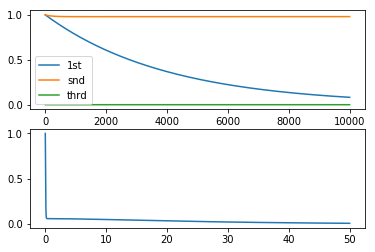

In [290]:
h = 0.005
mu1 = 0.05
mu2 = 0.02
mu3 = 0.3
sigma =  10.0
rho1 = -2.0
rho2 = 0.0
rho3 = 2.0
T = 10000

b = 1.0
e = 1.0

f = lambda t, x: np.array([e*(-mu1*x[0] + b*(1.0 - x[0])*np.exp(-sigma*(x[3] - rho1)**2)),
                  e*(-mu2*x[1] + b*(1.0 - x[1])*np.exp(-sigma*(x[3] - rho2)**2)),
                  e*(-mu3*x[2] + b*(1.0 - x[2])*np.exp(-sigma*(x[3] - rho3)**2)),
                  -1.0*(2.0*(x[3] - rho1)*(x[3] - rho2)*(x[3] - rho3)*((x[3] - rho1)*(x[3] - rho2) + (x[3] - rho1)*(x[3] -rho3) +
                    (x[3] - rho2)*(x[3] - rho3)) + (1.0 - x[0])**2*(x[3] - rho1) + (1.0 - x[1])**2*(x[3] - rho2) + (1.0 - x[2])**2*(x[3] - rho3))])

t, X = integrate( f, T, [1.0, 1.0, 0.0, 1.0] )
fig, ax = plt.subplots(2, 1)
ax[0].plot(X[0,:], label = '1st')
ax[0].plot( X[1,:], label = 'snd')
ax[0].plot( X[2,:], label = 'thrd')
ax[0].legend()
ax[1].plot(t, X[3,:])

plt.show()

Plotting the potential

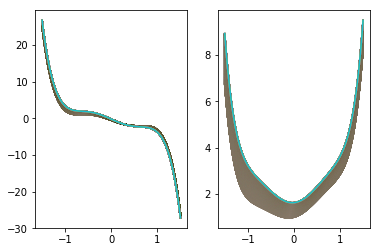

In [176]:



a = rho1 + rho2 + rho3
b = rho1*rho2 + rho2*rho3 + rho1*rho3
c = rho1*rho2*rho3
m,n = X.shape
fig, ax = plt.subplots(1,2)

for i in range(2000,4000,1):
    x1 = X[0,i]
    x2 = X[1,i]
    x3 = X[2,i]
    P = lambda x: -(2.0*(x - rho1)*(x - rho2)*(x - rho3)*((x - rho1)*(x - rho2) + (x - rho2)*(x - rho3) + (x - rho1)*(x - rho3)) +
                2.0*(1.0 - x1)*(x - rho1) + 2.0*(1.0 - x2)*(x - rho2) + 2.0*(1.0 - x3)*(x - rho3))
    Q = lambda x: -(6.0*x**5 - 10.0*a*x**4 + 2.0*(4.0*b + 2.0*a**2)*x**3 - 2.0*(3.0*a*b + 3.0*c)*x**2 + 2.0*(b**2 + 2.0*c*a)*x + 2.0*b*c +
               2.0*(1.0 - x1)*(x - rho1) + 2.0*(1.0 - x2)*(x - rho2) + 2.0*(1.0 - x3)*(x - rho3))
    
    phi = lambda rho: (rho - rho1)**2*(rho - rho2)**2*(rho - rho3)**2 + (1.0 - x1)*(rho - rho1)**2 + (1.0 - x2)*(rho - rho2)**2 + (1.0 - x3)*(rho - rho3)**2
    x = np.linspace(-1.5, 1.5, 100)
    ax[0].plot(x, Q(x))
    ax[1].plot(x, phi(x))
    


In [35]:
N = 100
mu = np.linspace(0, 10, N)

sigma = np.linspace(0, 40, N)

def hasImag(mu1, mu2, mu3, sigma):
   
    es = np.exp(-sigma)   
    alpha = es/(mu1 + es)
    beta = 1.0/(mu2 + 1.0)
    gamma = es/(mu3 + es)
    

    A = np.array([[-(mu1 + es), 0.0, 0.0, -2.0*sigma*(1.0 - alpha)*es],
                  [0.0, -(mu2 + 1.0), 0.0, 0.0],
                  [0.0, 0.0, -(mu3 + es), 2.0*sigma*(1.0 - gamma)*es],
                  [2.0, 0.0, -2.0, -8.0 + 2.0*alpha + 2.0*beta + 2.0*gamma]])

    w, v = np.linalg.eig(A)
    if np.any(np.abs(np.imag(w)) > 0):
        print w
    return np.any(np.abs(np.imag(w)) > 0)
       
for j in range(N):
    for i in range(N):
        mu1 = mu2 = mu3 = mu[i]

        if hasImag(mu1, mu2, mu3, sigma[j]):
            print "mu: ", mu1
            print "sigma: ", sigma[j]


[-5.62607172+0.27440169j -5.62607172-0.27440169j -4.30398078+0.j
 -4.63636364+0.j        ]
mu:  3.6363636363636362
sigma:  0.40404040404040403
[-5.68828951+0.4290001j -5.68828951-0.4290001j -4.40499088+0.j
 -4.73737374+0.j       ]
mu:  3.7373737373737375
sigma:  0.40404040404040403
[-5.74999634+0.53916936j -5.74999634-0.53916936j -4.50600098+0.j
 -4.83838384+0.j        ]
mu:  3.8383838383838382
sigma:  0.40404040404040403
[-5.81122497+0.62857542j -5.81122497-0.62857542j -4.60701109+0.j
 -4.93939394+0.j        ]
mu:  3.9393939393939394
sigma:  0.40404040404040403
[-5.87200541+0.70504478j -5.87200541-0.70504478j -4.70802119+0.j
 -5.04040404+0.j        ]
mu:  4.040404040404041
sigma:  0.40404040404040403
[-5.93236522+0.77233137j -5.93236522-0.77233137j -4.80903129+0.j
 -5.14141414+0.j        ]
mu:  4.141414141414141
sigma:  0.40404040404040403
[-5.99232973+0.83258022j -5.99232973-0.83258022j -4.91004139+0.j
 -5.24242424+0.j        ]
mu:  4.242424242424242
sigma:  0.40404040404040403
[-6.0

sigma:  2.0202020202020203
[-6.31578792+0.23327932j -6.31578792-0.23327932j -5.03804012+0.j
 -5.94949495+0.j        ]
mu:  4.94949494949495
sigma:  2.4242424242424243
[-6.36978991+0.41585061j -6.36978991-0.41585061j -5.13905022+0.j
 -6.05050505+0.j        ]
mu:  5.05050505050505
sigma:  2.4242424242424243
[-6.42367311+0.53598791j -6.42367311-0.53598791j -5.24006032+0.j
 -6.15151515+0.j        ]
mu:  5.151515151515151
sigma:  2.4242424242424243
[-6.47744349+0.63041834j -6.47744349-0.63041834j -5.34107043+0.j
 -6.25252525+0.j        ]
mu:  5.252525252525253
sigma:  2.4242424242424243
[-6.53110665+0.70945158j -6.53110665-0.70945158j -5.44208053+0.j
 -6.35353535+0.j        ]
mu:  5.353535353535354
sigma:  2.4242424242424243
[-6.58466779+0.77776963j -6.58466779-0.77776963j -5.54309063+0.j
 -6.45454545+0.j        ]
mu:  5.454545454545454
sigma:  2.4242424242424243
[-6.63813181+0.83797478j -6.63813181-0.83797478j -5.64410073+0.j
 -6.55555556+0.j        ]
mu:  5.555555555555555
sigma:  2.42424

sigma:  4.848484848484849
[-7.93226323+0.52854093j -7.93226323-0.52854093j -8.08864833+0.j
 -9.08080808+0.j        ]
mu:  8.080808080808081
sigma:  4.848484848484849
[-7.98400365+0.51139179j -7.98400365-0.51139179j -8.18965843+0.j
 -9.18181818+0.j        ]
mu:  8.181818181818182
sigma:  4.848484848484849
[-8.03571713+0.48869088j -8.03571713-0.48869088j -8.29066853+0.j
 -9.28282828+0.j        ]
mu:  8.282828282828282
sigma:  4.848484848484849
[-8.08740454+0.45960824j -8.08740454-0.45960824j -8.39167863+0.j
 -9.38383838+0.j        ]
mu:  8.383838383838384
sigma:  4.848484848484849
[-8.1390667 +0.42282064j -8.1390667 -0.42282064j -8.49268873+0.j
 -9.48484848+0.j        ]
mu:  8.484848484848484
sigma:  4.848484848484849
[-8.19070443+0.37606468j -8.19070443-0.37606468j -8.59369883+0.j
 -9.58585859+0.j        ]
mu:  8.585858585858587
sigma:  4.848484848484849
[-8.24231848+0.314921j -8.24231848-0.314921j -8.69470893+0.j
 -9.68686869+0.j      ]
mu:  8.686868686868687
sigma:  4.848484848484849


 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  13.737373737373737
[-7.77496501+0.00858784j -7.77496501-0.00858784j -7.7777785 +0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  14.141414141414142
[-7.77496496+0.00694011j -7.77496496-0.00694011j -7.77777826+0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  14.545454545454545
[-7.77496492+0.00552864j -7.77496492-0.00552864j -7.7777781 +0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  14.94949494949495
[-7.77496489+0.00429774j -7.77496489-0.00429774j -7.77777799+0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  15.353535353535353
[-7.77496487+0.00318823j -7.77496487-0.00318823j -7.77777792+0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  15.757575757575758
[-7.77496486+0.0021132j -7.77496486-0.0021132j -7.77777787+0.j
 -8.77777778+0.j       ]
mu:  7.777777777777778
sigma:  16.161616161616163
[-7.77496485+0.00074694j -7.77496485-0.00074694j -7.77777784+0.j
 -8.77777778+0.j 

Testing multiple motivations scenario

0.008926810104725881
333.32999999976937
0.03377470079145352


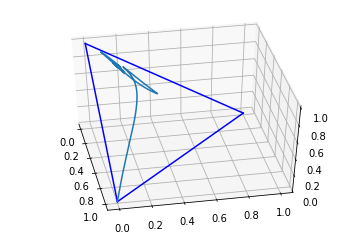

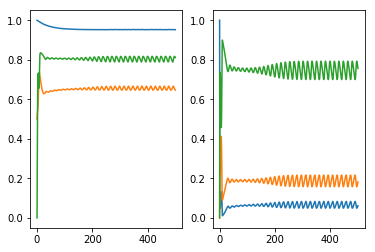

In [281]:
from mpl_toolkits.mplot3d import Axes3D

h = 0.005
mu1 = 0.001
mu2 = 0.02040816326530612
mu3 = 0.18367346938775508
sigma =  2.673469387755102
rho1 = np.array([1.0,0.0,0.0])
rho2 = np.array([0.0,1.0,0.0])
rho3 = np.array([0.0,0.0,1.0])
T = 100000

def f(t, x):
    u1 = x[0]
    u2 = x[1]
    u3 = x[2]
    rho = x[3:]
    drho = -2.0*((rho - rho1)*np.linalg.norm(rho - rho2)**2*np.linalg.norm(rho - rho3)**2 + 
                (rho - rho2)*np.linalg.norm(rho - rho1)**2*np.linalg.norm(rho - rho3)**2 +
                (rho - rho3)*np.linalg.norm(rho - rho1)**2*np.linalg.norm(rho - rho2)**2 +
                (1.0 - u1)*(rho - rho1) + (1.0 - u2)*(rho - rho2) + (1.0 - u3)*(rho - rho3))
    dx = np.concatenate((np.array([-mu1*u1 + (1 - u1)*np.exp(-sigma*np.linalg.norm(rho - rho1)**2),
                  -mu2*u2 + (1 - u2)*np.exp(-sigma*np.linalg.norm(rho - rho2)**2),
                  -mu3*u3 + (1 - u3)*np.exp(-sigma*np.linalg.norm(rho - rho3)**2)]),
                  drho.T))
    
    return dx

t, X = integrate( f, T, [1.0, 0.5, 0.0, 1.0, 0.0, 0.0] ) 



print np.sum(np.diff(X[3,8000:]))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.plot([rho1[0], rho2[0]], [rho1[1], rho2[1]], [rho1[2], rho2[2]], 'b')
ax.plot([rho1[0], rho3[0]], [rho1[1], rho3[1]], [rho1[2], rho3[2]], 'b')
ax.plot([rho3[0], rho2[0]], [rho3[1], rho2[1]], [rho3[2], rho2[2]], 'b')

ax.view_init(elev = 45, azim = -11)
ax.plot(X[3,:], X[4,:], X[5,:])

fig, ax = plt.subplots(1, 2)

ax[0].plot(t, X[0, :])
ax[0].plot(t, X[1, :])
ax[0].plot(t, X[2, :])


ax[1].plot(t, X[3, :])
ax[1].plot(t, X[4, :])
ax[1].plot(t, X[5, :])

print t[int(2*T/3)]
print (np.max(X[3,int(2*T/3):])-np.min(X[3,int(2*T/3):]))


In [276]:
from mpl_toolkits.mplot3d import Axes3D

h = 0.005
rho1 = np.array([1.0,0.0,0.0])
rho2 = np.array([0.0,1.0,0.0])
rho3 = np.array([0.0,0.0,1.0])
T = 20000



mus = np.linspace(0, 1, 50)
sigmas = np.linspace(0, 20, 50)

for i1 in range(len(mus)):
    for i2 in range(len(mus)):
        for i3 in range(len(mus)):
            for k in range(len(sigmas)):
                mu1 = mus[i1]
                mu2 = mus[i2]
                mu3 = mus[i3]
                sigma =  sigmas[k]

                def f(t, x):
                    u1 = x[0]
                    u2 = x[1]
                    u3 = x[2]
                    rho = x[3:]
                    drho = -2.0*((rho - rho1)*np.linalg.norm(rho - rho2)**2*np.linalg.norm(rho - rho3)**2 + 
                                (rho - rho2)*np.linalg.norm(rho - rho1)**2*np.linalg.norm(rho - rho3)**2 +
                                (rho - rho3)*np.linalg.norm(rho - rho1)**2*np.linalg.norm(rho - rho2)**2 +
                                (1.0 - u1)*(rho - rho1) + (1.0 - u2)*(rho - rho2) + (1.0 - u3)*(rho - rho3))
                    dx = np.concatenate((np.array([-mu1*u1 + (1 - u1)*np.exp(-sigma*np.linalg.norm(rho - rho1)**2),
                                  -mu2*u2 + (1 - u2)*np.exp(-sigma*np.linalg.norm(rho - rho2)**2),
                                  -mu3*u3 + (1 - u3)*np.exp(-sigma*np.linalg.norm(rho - rho3)**2)]),
                                  drho.T))

                    return dx

                t, X = integrate( f, T, [1.0, 0.5, 0.0, 1.0, 0.0, 0.0] ) 

                if (np.max(X[3,int(2*T/3):])-np.min(X[3,int(2*T/3):])) > 0.1:
                    print "Found: mu1 = ", mu1,", mu2 =", mu2, ", mu3 = ", mu3, ", sigma = ", sigma
        

KeyboardInterrupt: 

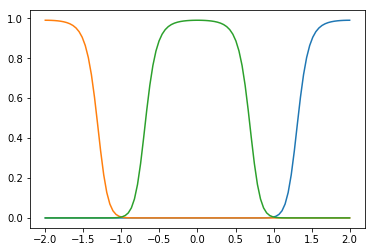

In [285]:
a = 0.01
b = 1.0
sigma = 10.0
u = lambda rho, rho1: b*np.exp(-sigma*(rho - rho1)**2)/(a + b*np.exp(-sigma*(rho - rho1)**2))

rho = np.linspace(-2, 2, 100)

plt.plot(rho, u(rho, 2))
plt.plot(rho, u(rho, -2))
plt.plot(rho, u(rho, 0))